In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
genotype = pd.read_csv("/scratch/users/omer_ronen/mutemb_esm/X_k_5_ilvm_oh.csv")
print(genotype.shape)

(22542, 365)


In [3]:
phenotype = pd.read_csv('/scratch/users/omer_ronen/mutemb_esm/y_ilvm_oh.csv')
print(phenotype.shape)

(22542, 1)


In [48]:
# remove first column which is the index
# genotype = genotype.iloc[:,1:]
# phenotype = phenotype.iloc[:,1:]

# make phenotype a 1D numpy array
phenotype = phenotype.to_numpy().reshape(-1)

In [49]:
# train-test split
genotype_train, genotype_test, phenotype_train, phenotype_test = \
    train_test_split(genotype, phenotype, test_size = 0.3, random_state = 42)

In [50]:
# get average of phenotype for genotype['0']==0 and genotype['0']==1
phenotype_0 = phenotype_train[genotype_train['0']==0]
phenotype_1 = phenotype_train[genotype_train['0']==1]
print(np.mean(phenotype_0))
print(np.mean(phenotype_1))

44.925074823624456
46.61814275853355


In [51]:
# create array of np.mean(phenotype_0) if genotype['0']==0 and np.mean(phenotype_1) if genotype['0']==1
phenotype_test_pred = np.where(genotype_test['0']==0, np.mean(phenotype_0), np.mean(phenotype_1))
# calculate correlation between phenotype_train and phenotype_train_pred
np.corrcoef(phenotype_test, phenotype_test_pred)

array([[1.        , 0.12068478],
       [0.12068478, 1.        ]])

In [52]:
# fit random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(genotype_train, phenotype_train)

RandomForestRegressor(random_state=42)

In [53]:
# predict on test set
phenotype_pred = rf.predict(genotype_test)

In [54]:
# calculate correlation for pred-check
np.corrcoef(phenotype_pred, phenotype_test_pred)[0,1]

0.43609822112817503

In [55]:
np.corrcoef(phenotype_test, phenotype_pred)

array([[1.        , 0.05106382],
       [0.05106382, 1.        ]])

In [56]:
# get MDI feature importance scores
importances = rf.feature_importances_

In [57]:
# get max and min feature importance scores
max_imp = np.max(importances)
min_imp = np.min(importances)
[min_imp, max_imp]

[0.0, 0.0918999839333947]

In [58]:
# get number of features with nonzero importance
num_nonzero = np.sum(importances > 0)
num_nonzero

549

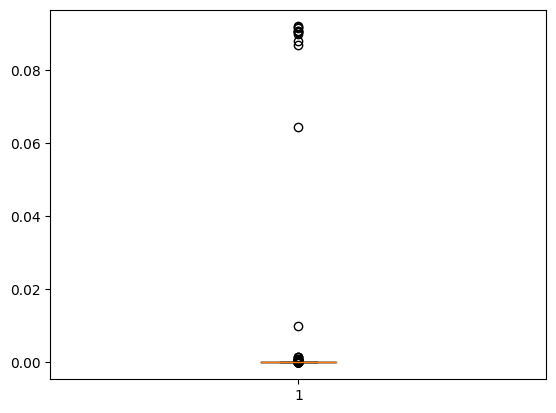

In [59]:
# plot importances in boxplot
plt.boxplot(importances)
plt.show()

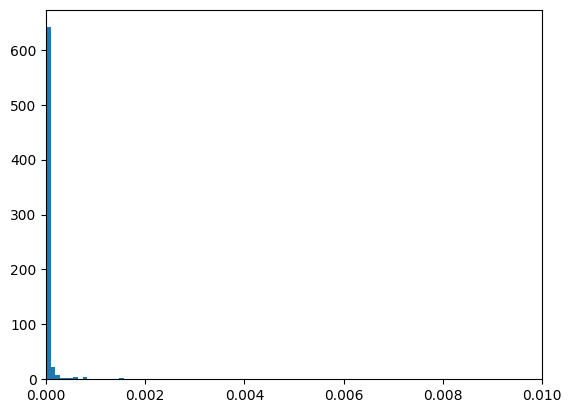

In [60]:
# plot importance in histogram, zoom in on the left tail
plt.hist(importances, bins = 1000)
plt.xlim(0, 0.01)
plt.show()
